# Info

* Data: https://www.kaggle.com/datasets/nehalbirla/vehicle-dataset-from-cardekho/data

In [1]:
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib.pyplot as plt
import sklearn

In [2]:
import os
from pathlib import Path

In [12]:
import seaborn as sns

# Import data

In [3]:
Path.cwd()

PosixPath('/home/sameervk/Documents/Training/MachineLearning/OpenDataScienceSandbox/QuantileRegression')

In [6]:
data_file = Path.cwd().parent.joinpath("datasets/kaggle/CAR DETAILS FROM CAR DEKHO.csv")

In [7]:
df = pd.read_csv(data_file)
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


# Data exploration

In [9]:
# number of unique models
df['name'].nunique()

1491

#### NOTE
* Assuming 1491 models

## Box plots

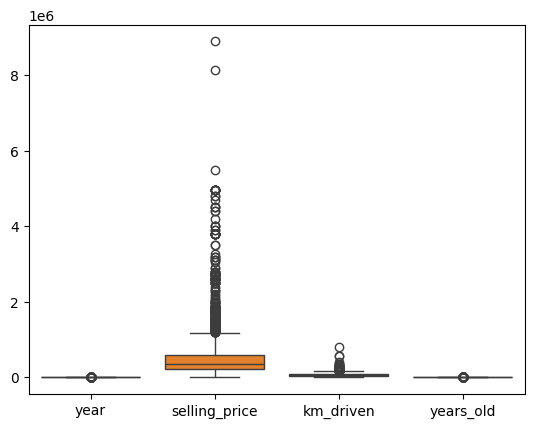

In [43]:
sns.boxplot(df)
plt.show()

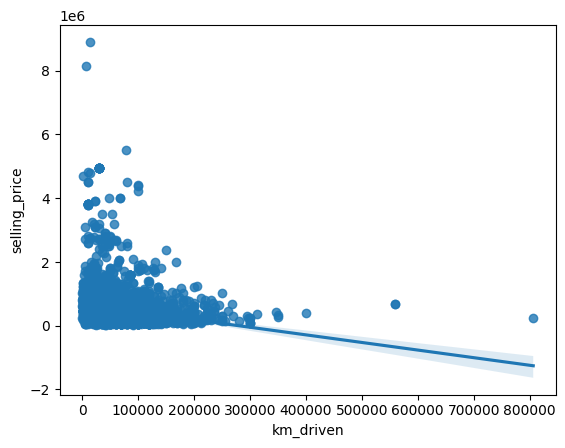

In [19]:
sns.regplot(x="km_driven", y="selling_price", data=df, y_jitter=10000)
plt.show()

## Pairplots

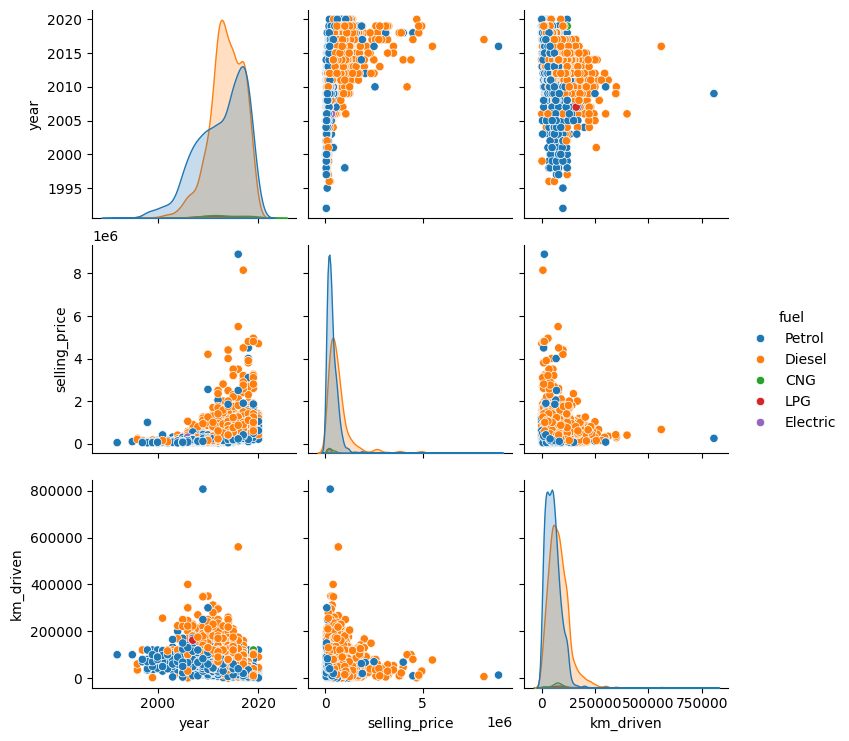

In [22]:
sns.pairplot(df, hue="fuel")
plt.show()

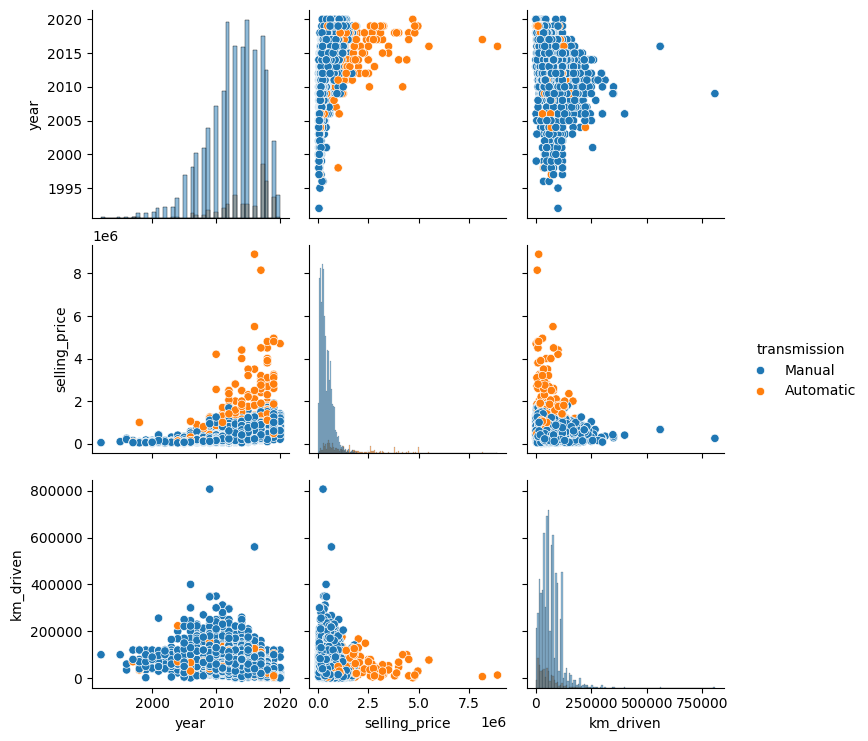

In [27]:
sns.pairplot(df, kind="scatter", diag_kind="hist", hue="transmission")
plt.show()

## Additional column

In [28]:
# Adding the number of years old column
df['years_old'] = df.year.max() - df.year
df

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,years_old
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner,13
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner,13
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner,8
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner,3
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner,6
...,...,...,...,...,...,...,...,...,...
4335,Hyundai i20 Magna 1.4 CRDi (Diesel),2014,409999,80000,Diesel,Individual,Manual,Second Owner,6
4336,Hyundai i20 Magna 1.4 CRDi,2014,409999,80000,Diesel,Individual,Manual,Second Owner,6
4337,Maruti 800 AC BSIII,2009,110000,83000,Petrol,Individual,Manual,Second Owner,11
4338,Hyundai Creta 1.6 CRDi SX Option,2016,865000,90000,Diesel,Individual,Manual,First Owner,4


* This doesn't affect the scatter plot

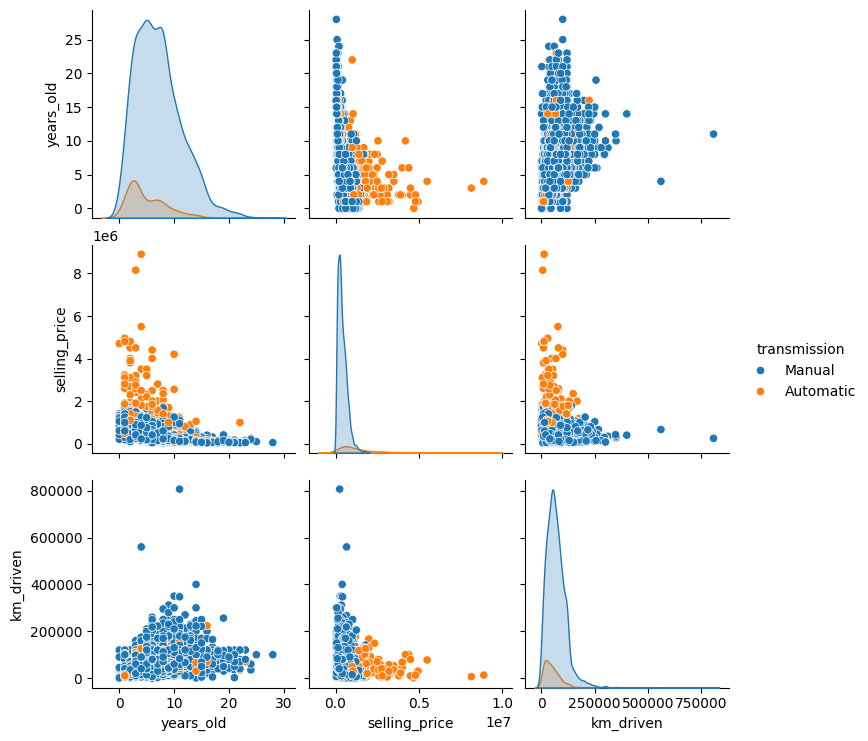

In [32]:
# checking
sns.pairplot(df,
             vars=["years_old", "selling_price", "km_driven"],              
             hue="transmission"
            )
plt.show()

## Correlation

### Pearson

In [36]:
df_corr = df[cols_of_interest].corr(method='pearson')
df_corr

,years_old,selling_price,km_driven
years_old,1.000000,-0.413922,0.419688
selling_price,-0.413922,1.000000,-0.192289
km_driven,0.419688,-0.192289,1.000000


#### Heatmap

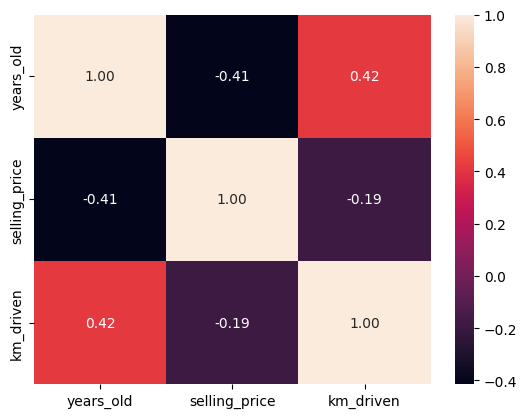

In [42]:
sns.heatmap(df_corr, annot=True, fmt='0.2f')
plt.show()

### Spearman

* It is a strength of monotonic relationship between the variables

## TODO:

1. Recap KDE
2. Box plot
3. Correlation coefficient and heat maps
4. Correlation matrix